In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_ready.csv')

In [3]:
df.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [4]:
# Create Independent and dependent variable 
x=df.drop('FWI',axis=1)
y=df['FWI']

In [5]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [6]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [7]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

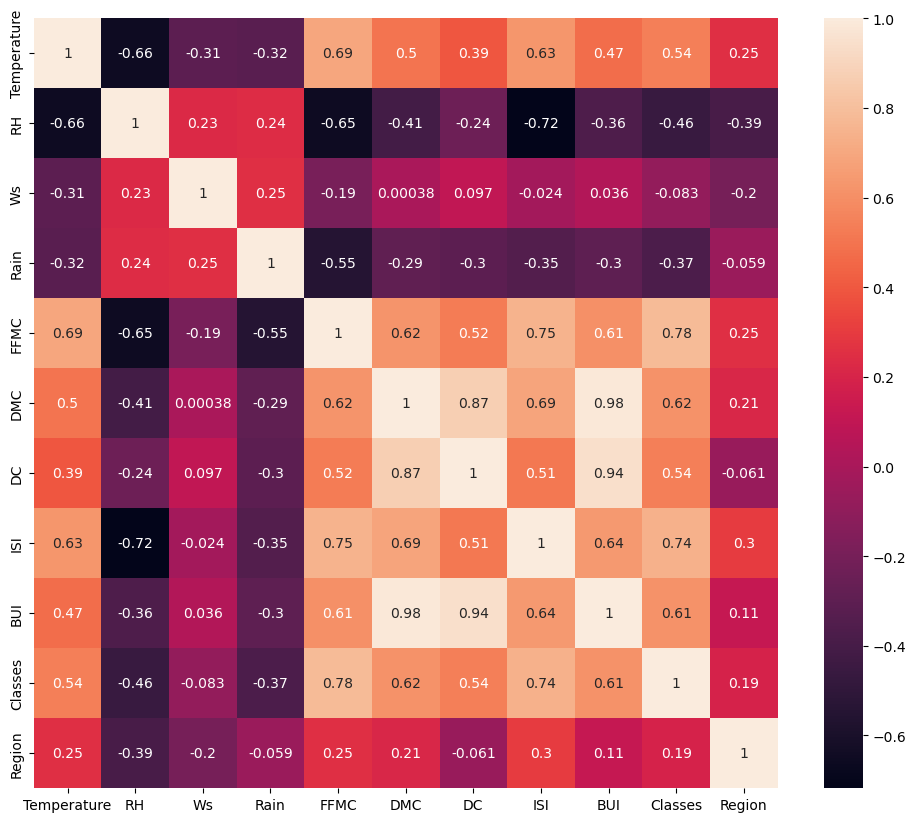

In [8]:
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show(1)

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features=correlation(x_train,0.85) #This 2 features are highly corelated so drop
corr_features

{'BUI', 'DC'}

In [11]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

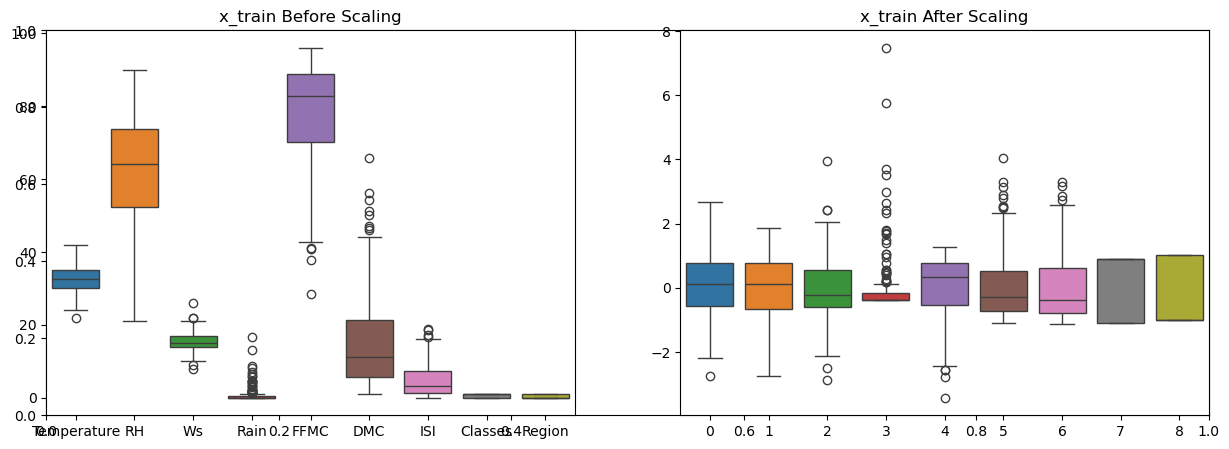

In [14]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train After Scaling')
plt.show(1)

# Linear Regression

Mean absolute error 0.5468236465249993
R2 Score 0.9847657384266951


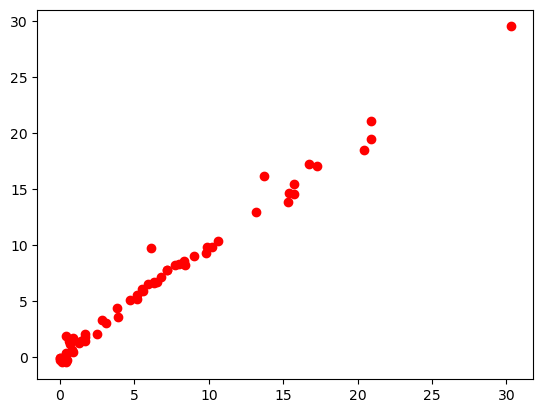

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred,color='r')
plt.show(1)

# Lasso Regrission with Cross validation

Mean absolute error 0.6199701158263432
R2 Score 0.9820946715928275


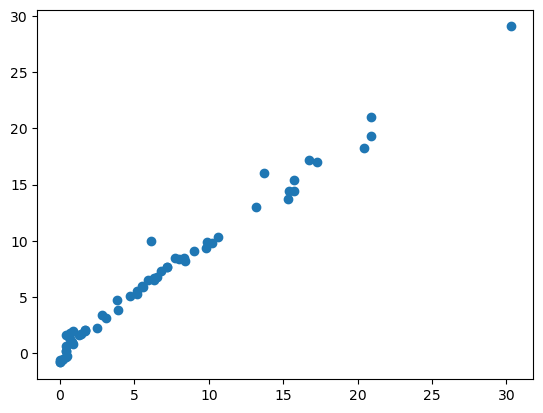

In [18]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show(1)

# Ridge Regression with Cross Validation

Mean absolute error 0.5642305340105717
R2 Score 0.9842993364555513


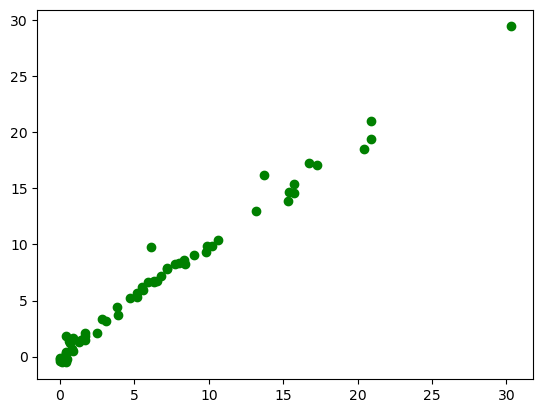

In [20]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred,color='g')
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show(1)

# ElasticNet With Cross validation

Mean absolute error 0.6575946731430905
R2 Score 0.9814217587854941


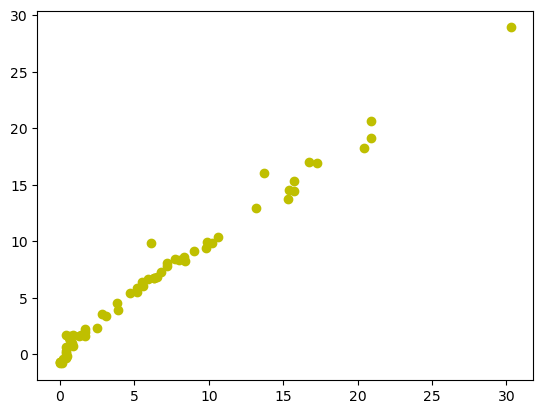

In [22]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred,color='y')
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show(1)

# Pickle

In [24]:
scaler

StandardScaler()

In [29]:
ridgecv

RidgeCV(cv=5)

In [33]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

pickle.dump(ridgecv,open('ridgecv.pkl','wb'))